In [19]:
# merge DAM and DCH price data
import pandas as pd
import numpy as np

# Read DAM EFA block averages
dam_data = pd.read_csv('EFA_Block_DAM_Averages.csv')
dam_data['Delivery_Date'] = pd.to_datetime(dam_data['Delivery_Date'])
dam_data['Delivery_Date'] = dam_data['Delivery_Date'].dt.strftime('%d/%m/%Y')

# Read DCH weighted averages
dch_data = pd.read_csv('DCH_Weighted_Average_Prices.csv')

# Merge the datasets
merged_data = pd.merge(
    dam_data, 
    dch_data, 
    left_on=['Delivery_Date', 'EFA_Block'], 
    right_on=['Delivery date', 'EFA block of the day'], 
    how='inner'
)

# Select and rename columns
final_data = merged_data[['Delivery_Date', 'EFA_Block', 'Average_DAM_Price', 'Weighted_Avg_Clearing_Price']].copy()
final_data.columns = ['Delivery day', 'EFA block of the day', 'Average DAM price in EFA block', 'DCH_Clearing_Price']

# Check for missing values and fill with overall averages
print("Missing values check:")
print(final_data.isnull().sum())

if final_data['DCH_Clearing_Price'].isnull().any():
    dam_mean = final_data['Average DAM price in EFA block'].mean()
    final_data['Average DAM price in EFA block'].fillna(dam_mean, inplace=True)
    print(f"Filled missing DAM prices with average: £{dam_mean:.2f}")

if final_data['DCH_Clearing_Price'].isnull().any():
    dch_mean = final_data['DCH_Clearing_Price'].mean()
    final_data['DCH_Clearing_Price'].fillna(dch_mean, inplace=True)
    print(f"Filled missing DCH prices with average: £{dch_mean:.2f}")

print("After filling:")
print(final_data.isnull().sum())

#Convert Delivery Date to datetime format
final_data['Delivery day'] = pd.to_datetime(final_data['Delivery day'], format='%d/%m/%Y')

# Save merged and cleaned dataset with datetime parsing
final_data.to_csv('DAM_DCH_Merged_Prices.csv', index=False)

# Verify the datetime format is preserved when reading back
test_read = pd.read_csv('DAM_DCH_Merged_Prices.csv', parse_dates=['Delivery day'])
print(f"Date column dtype after reading: {test_read['Delivery day'].dtype}")
print(f"Sample dates: {test_read['Delivery day'].head(3).tolist()}")

print(f"Merged and cleaned dataset created with {len(final_data)} records")
print(final_data.head(10))

Missing values check:
Delivery day                      0
EFA block of the day              0
Average DAM price in EFA block    0
DCH_Clearing_Price                0
dtype: int64
After filling:
Delivery day                      0
EFA block of the day              0
Average DAM price in EFA block    0
DCH_Clearing_Price                0
dtype: int64
Date column dtype after reading: datetime64[ns]
Sample dates: [Timestamp('2023-11-03 00:00:00'), Timestamp('2023-11-03 00:00:00'), Timestamp('2023-11-03 00:00:00')]
Merged and cleaned dataset created with 3635 records
  Delivery day  EFA block of the day  Average DAM price in EFA block  \
0   2023-11-03                     1                         23.3125   
1   2023-11-03                     2                         40.6750   
2   2023-11-03                     3                         84.4500   
3   2023-11-03                     4                         73.5250   
4   2023-11-03                     5                         93.0000   

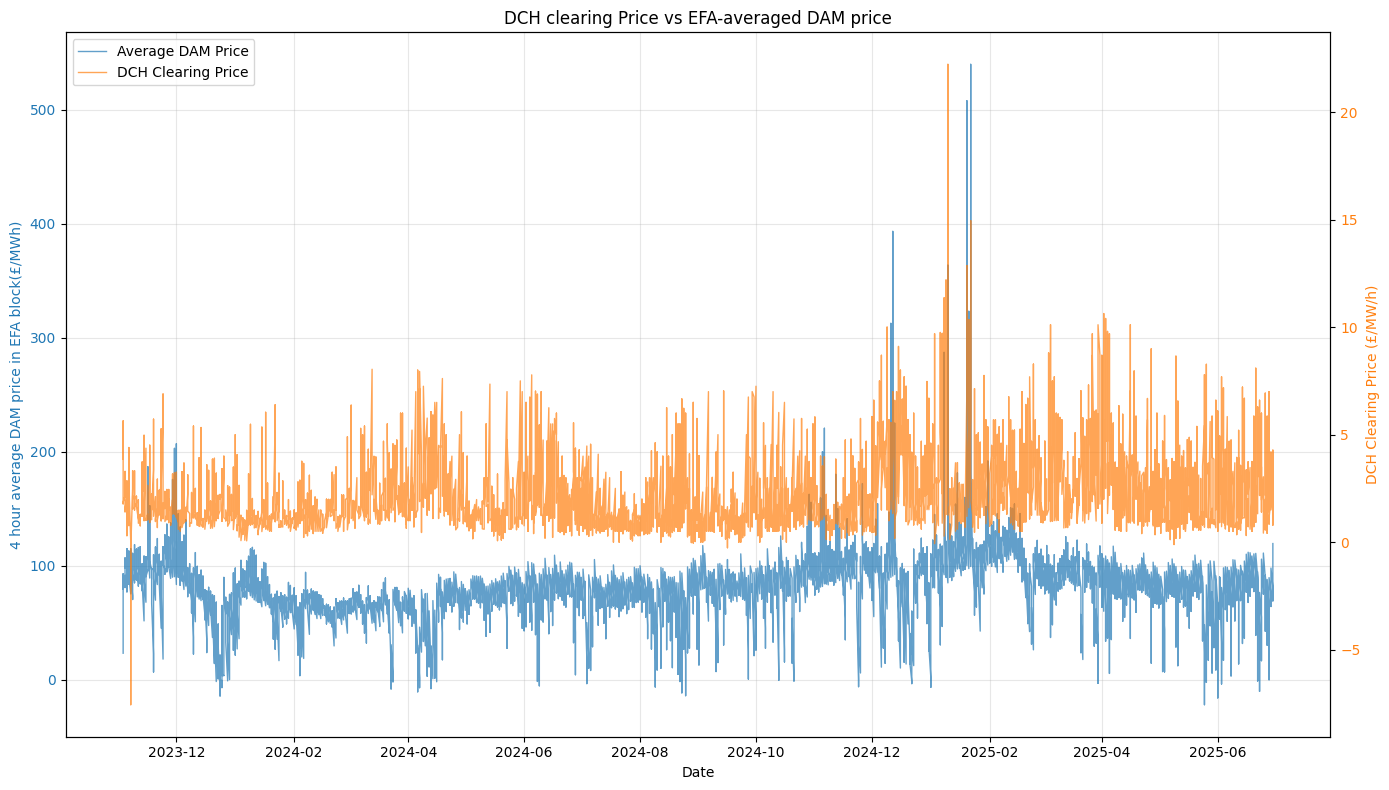

In [22]:
# Plot DCH price with EFA-averaed DAM price
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.plot(df['Delivery day'], df['Average DAM price in EFA block'], 
         color=color1, alpha=0.7, linewidth=1, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.plot(df['Delivery day'], df['DCH_Clearing_Price'], 
         color=color2, alpha=0.7, linewidth=1, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price')
ax1.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

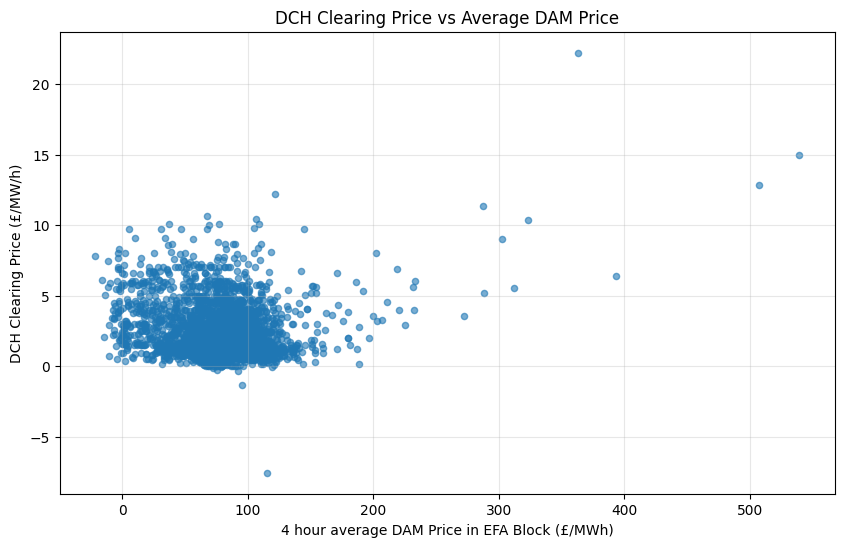

In [16]:
# Simple scatter plot of EFA-averaged DAM vs DCH prices
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Average DAM price in EFA block'], df['DCH_Clearing_Price'], 
            alpha=0.6, s=20)
plt.xlabel('4 hour average DAM Price in EFA Block (£/MWh)')
plt.ylabel('DCH Clearing Price (£/MW/h)')
plt.title('DCH Clearing Price vs Average DAM Price')
plt.grid(True, alpha=0.3)
plt.show()

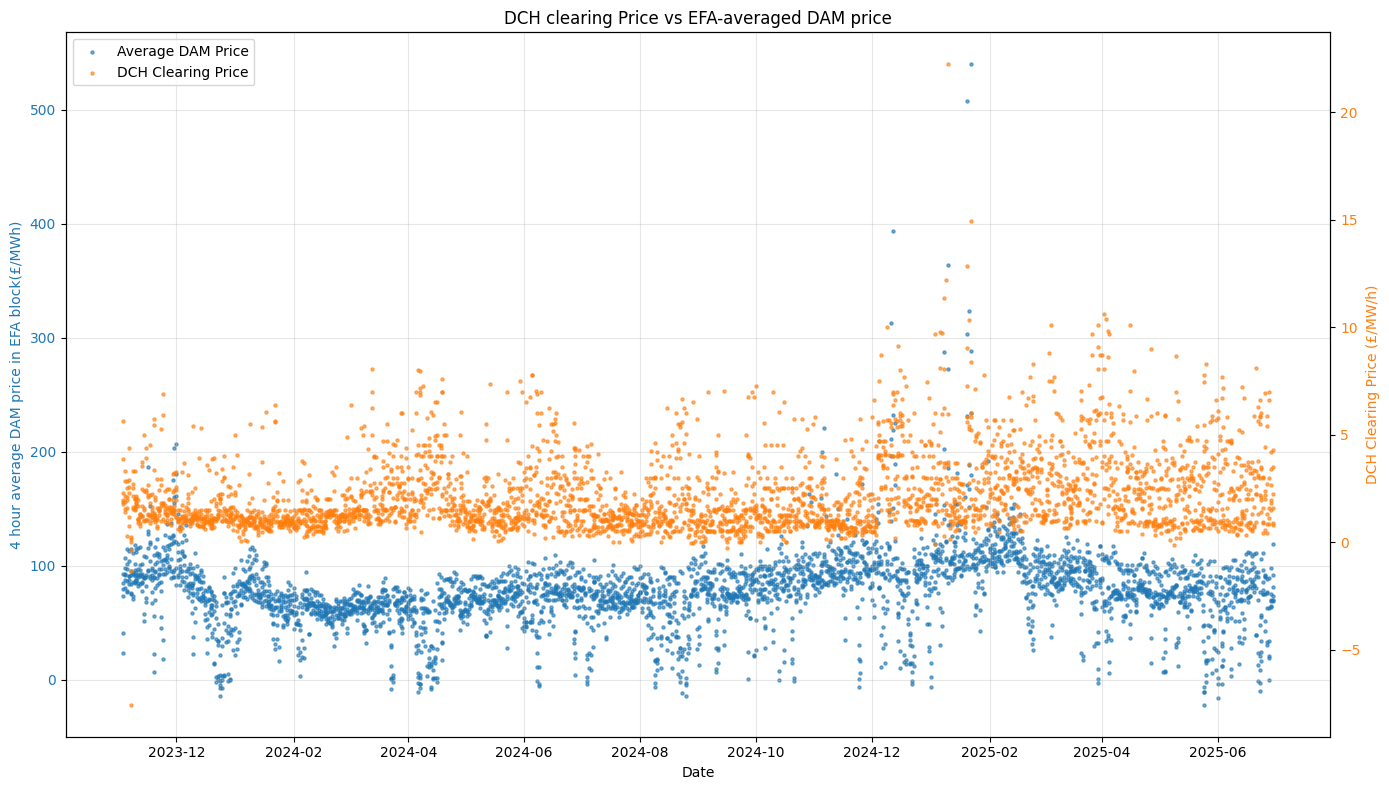

In [23]:
# Plot DCH price with EFA-averaed DAM price
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis with dots
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.scatter(df['Delivery day'], df['Average DAM price in EFA block'], 
           color=color1, alpha=0.6, s=5, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price with dots
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.scatter(df['Delivery day'], df['DCH_Clearing_Price'], 
           color=color2, alpha=0.6, s=5, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price')
ax1.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

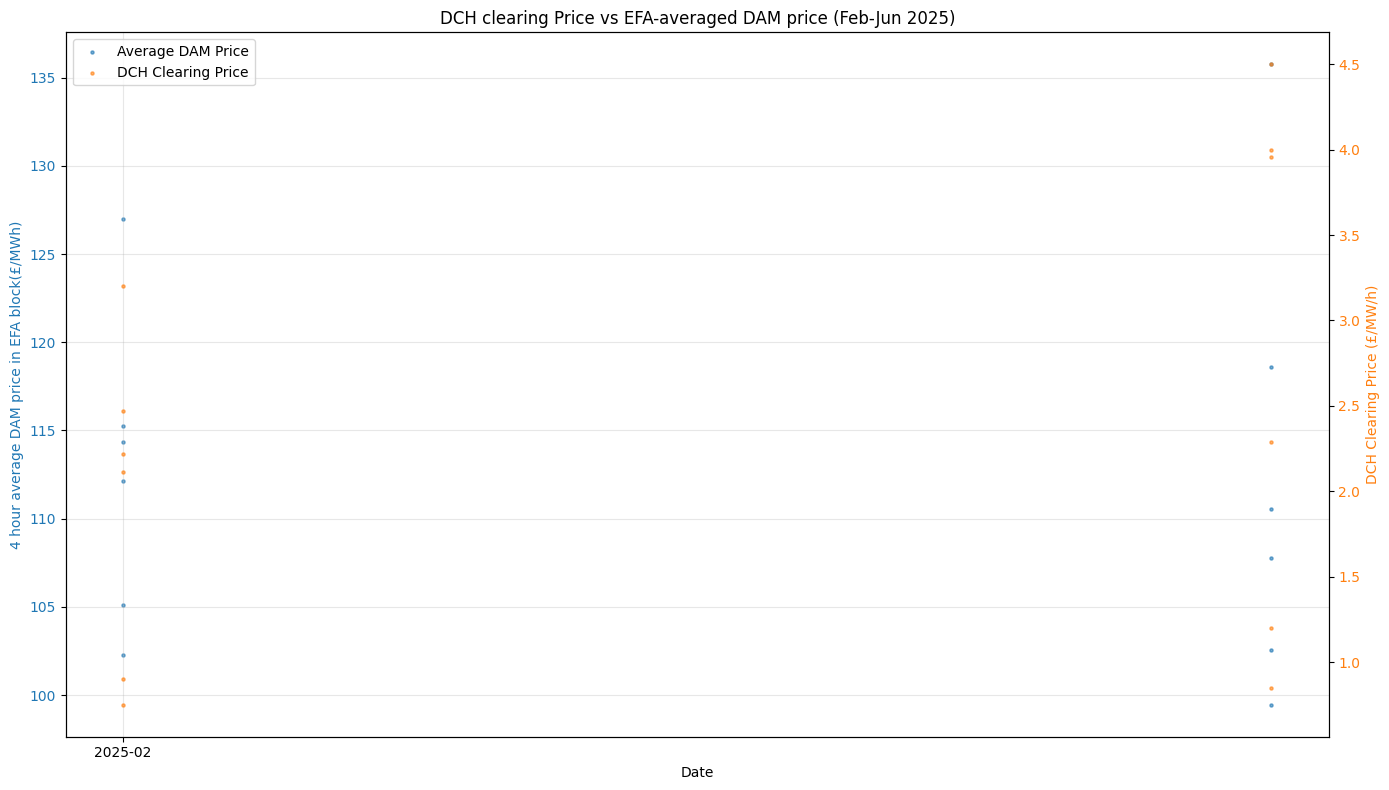

In [28]:
# Plot DCH price with EFA-averaed DAM price for 2025-02 to 2025-06
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Filter data for 2025-02 to 2025-06
start_date = '2025-02-01'
end_date = '2025-02-02'
df_filtered = df[(df['Delivery day'] >= start_date) & (df['Delivery day'] <= end_date)]

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis with dots
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.scatter(df_filtered['Delivery day'], df_filtered['Average DAM price in EFA block'], 
           color=color1, alpha=0.6, s=5, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price with dots
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.scatter(df_filtered['Delivery day'], df_filtered['DCH_Clearing_Price'], 
           color=color2, alpha=0.6, s=5, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price (Feb-Jun 2025)')
ax1.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

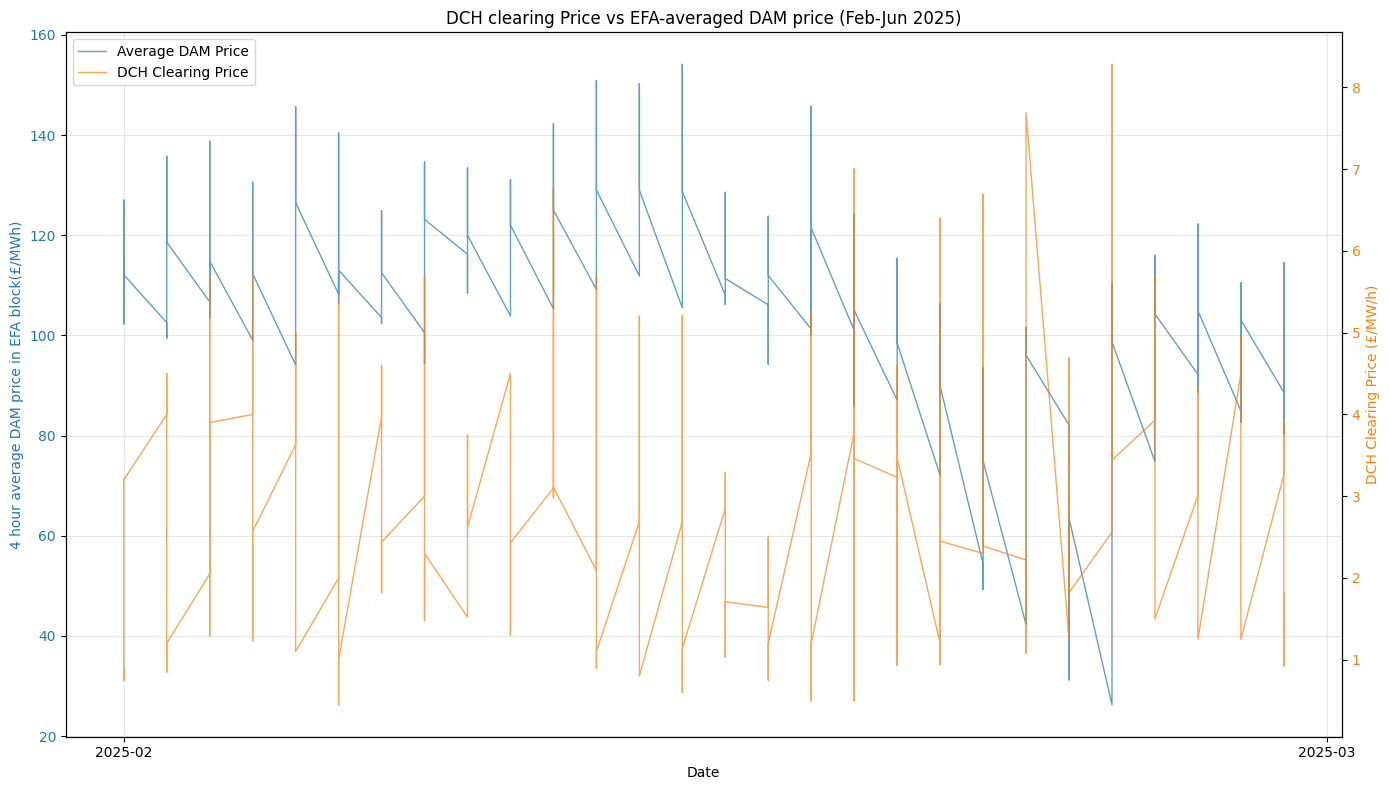

In [26]:
# Plot DCH price with EFA-averaed DAM price for 2025-02 to 2025-06
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Filter data for 2025-02 to 2025-06
start_date = '2025-02-01'
end_date = '2025-02-28'
df_filtered = df[(df['Delivery day'] >= start_date) & (df['Delivery day'] <= end_date)]

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis with lines
color1 = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.plot(df_filtered['Delivery day'], df_filtered['Average DAM price in EFA block'], 
         color=color1, alpha=0.7, linewidth=1, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price with lines
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.plot(df_filtered['Delivery day'], df_filtered['DCH_Clearing_Price'], 
         color=color2, alpha=0.7, linewidth=1, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price (Feb-Jun 2025)')
ax1.grid(True, alpha=0.3)

# Format x-axis dates
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

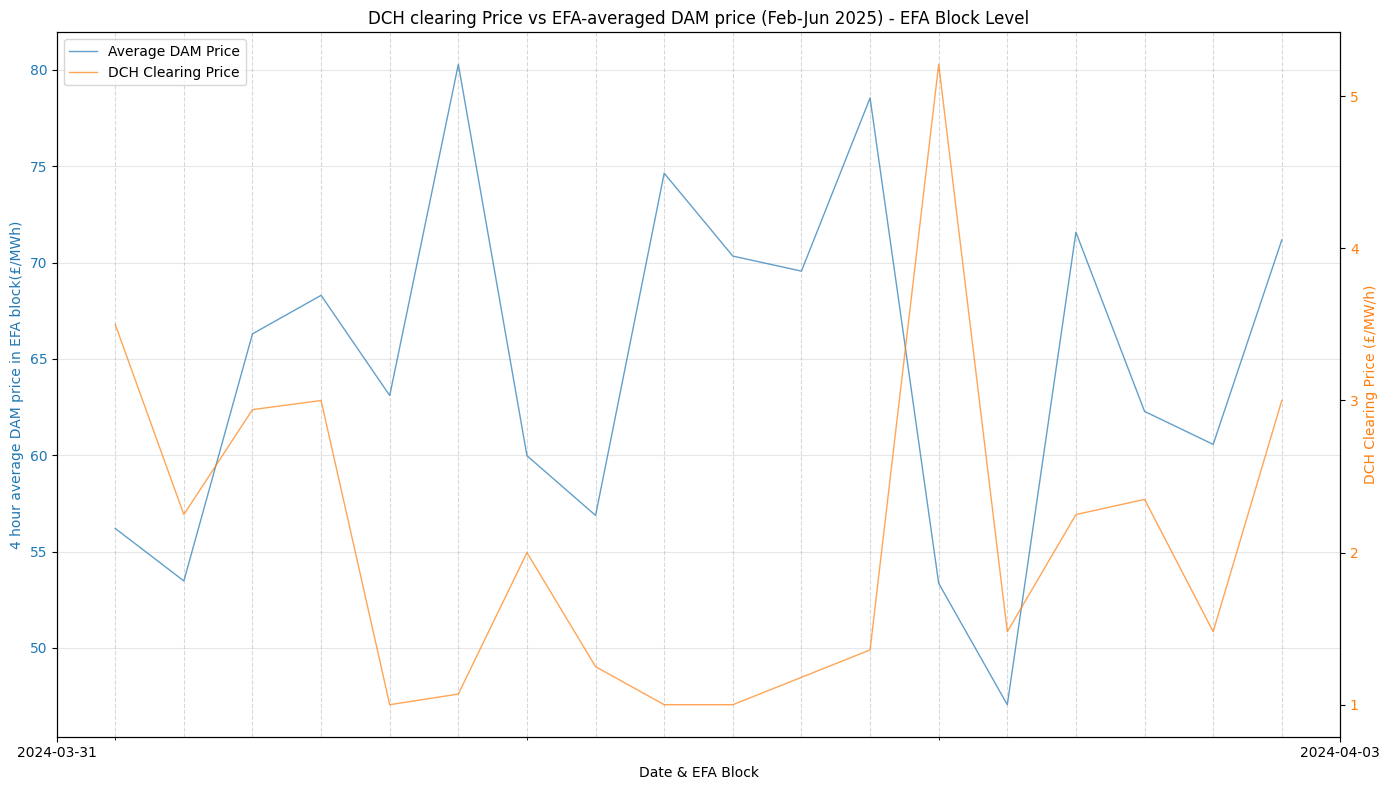

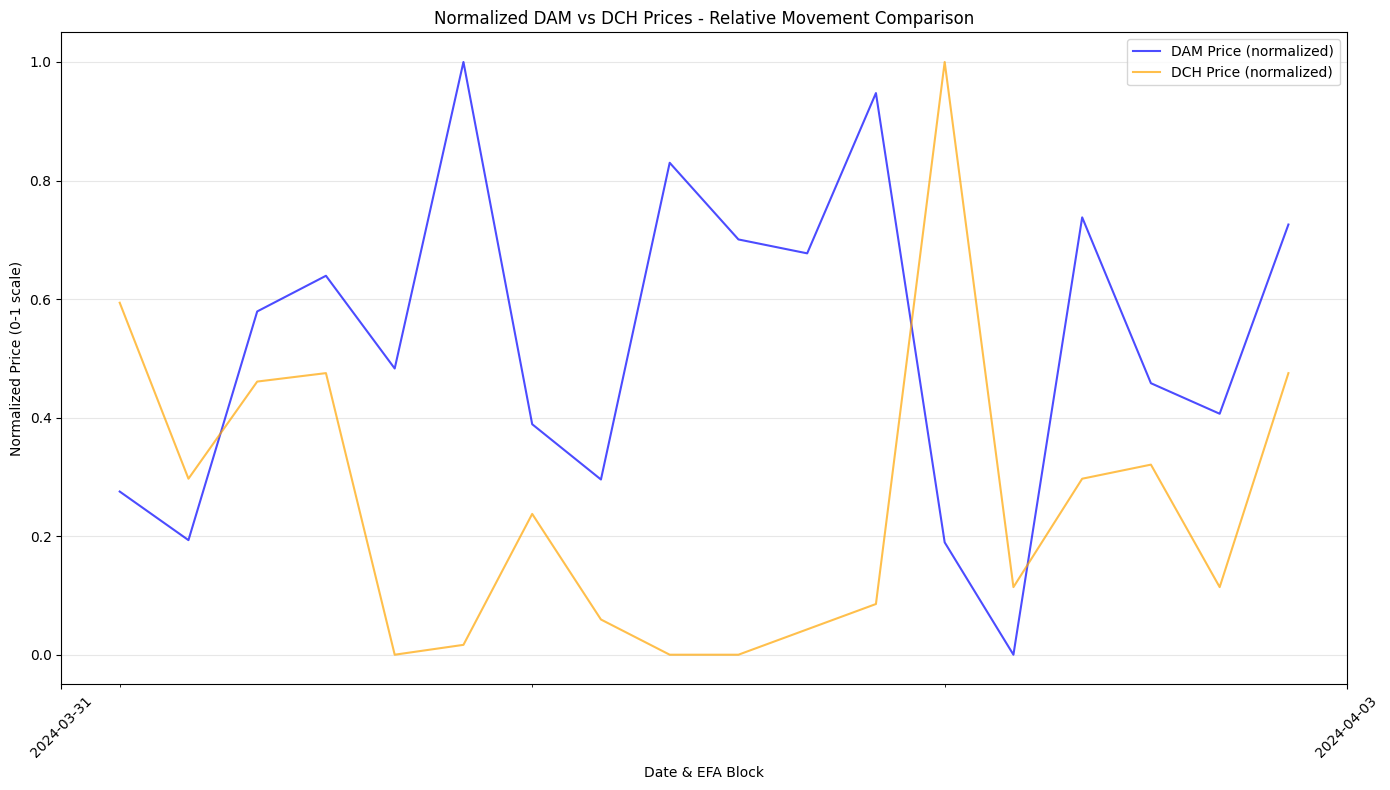

Total data points: 18
Date range: 2024-04-01 00:00:00 to 2024-04-03 20:00:00
EFA blocks per day: 6


In [ ]:
# Plot DCH price with EFA-averaed DAM price for 2025-02 to 2025-06 with EFA block granularity
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Create datetime with EFA block timing (each EFA block is 4 hours)
# EFA Block 1: 00:00-04:00, Block 2: 04:00-08:00, etc.
df['EFA_start_hour'] = (df['EFA block of the day'] - 1) * 4
df['DateTime_EFA'] = df['Delivery day'] + pd.to_timedelta(df['EFA_start_hour'], unit='h')

# Filter data for 2025-02 to 2025-06
start_date = '2024-04-01'
end_date = '2024-04-03'
df_filtered = df[(df['Delivery day'] >= start_date) & (df['Delivery day'] <= end_date)]

# Sort by the new datetime column to ensure proper line plotting
df_filtered = df_filtered.sort_values('DateTime_EFA')

# Normalize both series to 0-1 scale for visual comparison
scaler = MinMaxScaler()
df_filtered = df_filtered.copy()
df_filtered['DAM_normalized'] = scaler.fit_transform(df_filtered[['Average DAM price in EFA block']])
df_filtered['DCH_normalized'] = scaler.fit_transform(df_filtered[['DCH_Clearing_Price']])

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis with lines
color1 = 'tab:blue'
ax1.set_xlabel('Date & EFA Block')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.plot(df_filtered['DateTime_EFA'], df_filtered['Average DAM price in EFA block'], 
         color=color1, alpha=0.7, linewidth=1, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price with lines
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.plot(df_filtered['DateTime_EFA'], df_filtered['DCH_Clearing_Price'], 
         color=color2, alpha=0.7, linewidth=1, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add vertical dashed lines at each EFA block start time
for _, row in df_filtered.iterrows():
    ax1.axvline(x=row['DateTime_EFA'], color='gray', linestyle='--', alpha=0.3, linewidth=0.8)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price (Feb-Jun 2025) - EFA Block Level')
ax1.grid(True, alpha=0.3)

# Format x-axis dates to show both dates and some granularity
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Daily minor ticks
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Create normalized comparison plot
fig2, ax3 = plt.subplots(figsize=(14, 8))

# Plot normalized versions on same axis
ax3.plot(df_filtered['DateTime_EFA'], df_filtered['DAM_normalized'], 
         color='blue', alpha=0.7, linewidth=1.5, label='DAM Price (normalized)')
ax3.plot(df_filtered['DateTime_EFA'], df_filtered['DCH_normalized'], 
         color='orange', alpha=0.7, linewidth=1.5, label='DCH Price (normalized)')

ax3.set_xlabel('Date & EFA Block')
ax3.set_ylabel('Normalized Price (0-1 scale)')
ax3.set_title('Normalized DAM vs DCH Prices - Relative Movement Comparison')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Format x-axis
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print info about the data granularity
print(f"Total data points: {len(df_filtered)}")
print(f"Date range: {df_filtered['DateTime_EFA'].min()} to {df_filtered['DateTime_EFA'].max()}")
print(f"EFA blocks per day: {df_filtered.groupby('Delivery day').size().iloc[0]}")

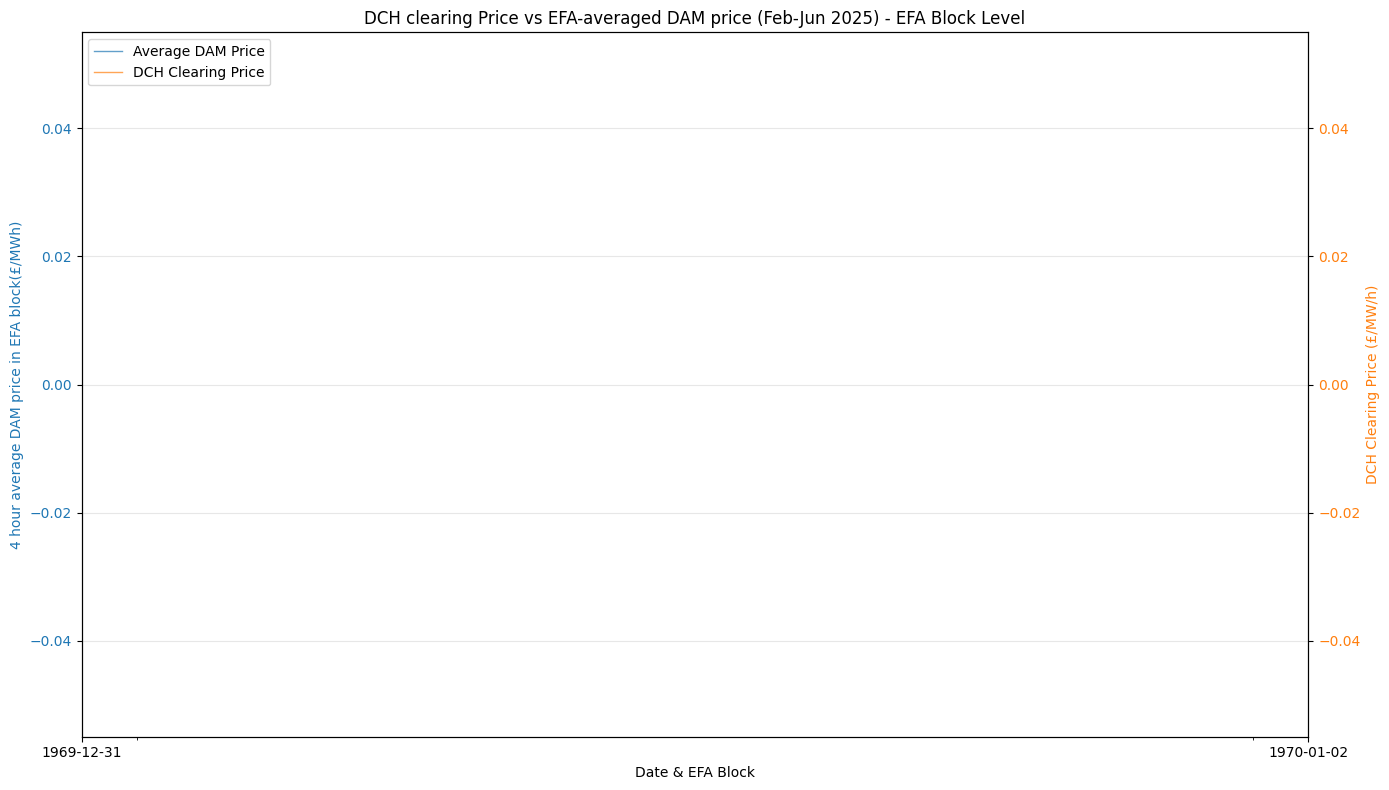

KeyError: 'DAM_normalized'

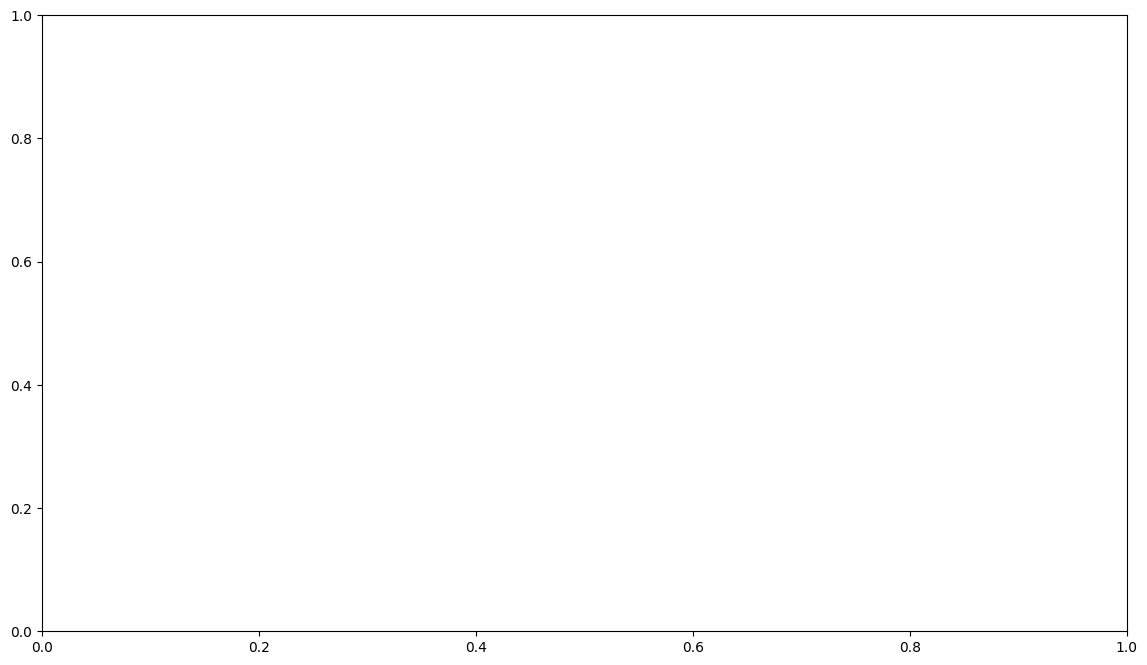

In [ ]:
# Plot DCH price with EFA-averaed DAM price for 2025-02 to 2025-06 with EFA block granularity
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read the merged data
df = pd.read_csv('DAM_DCH_Merged_Prices.csv')
df['Delivery day'] = pd.to_datetime(df['Delivery day'])

# Create datetime with EFA block timing (each EFA block is 4 hours)
# EFA Block 1: 00:00-04:00, Block 2: 04:00-08:00, etc.
df['EFA_start_hour'] = (df['EFA block of the day'] - 1) * 4
df['DateTime_EFA'] = df['Delivery day'] + pd.to_timedelta(df['EFA_start_hour'], unit='h')

# Filter data for 2025-02 to 2025-06
start_date = '2025-01-31'
end_date = '2025-01-06'
df_filtered = df[(df['Delivery day'] >= start_date) & (df['Delivery day'] <= end_date)]

# Sort by the new datetime column to ensure proper line plotting
df_filtered = df_filtered.sort_values('DateTime_EFA')

# Normalize both series to 0-1 scale for visual comparison
scaler = MinMaxScaler()
df_filtered = df_filtered.copy()
df_filtered['DAM_normalized'] = scaler.fit_transform(df_filtered[['Average DAM price in EFA block']])
df_filtered['DCH_normalized'] = scaler.fit_transform(df_filtered[['DCH_Clearing_Price']])

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot DAM price on primary y-axis with lines
color1 = 'tab:blue'
ax1.set_xlabel('Date & EFA Block')
ax1.set_ylabel('4 hour average DAM price in EFA block(£/MWh)', color=color1)
ax1.plot(df_filtered['DateTime_EFA'], df_filtered['Average DAM price in EFA block'], 
         color=color1, alpha=0.7, linewidth=1, label='Average DAM Price')
ax1.tick_params(axis='y', labelcolor=color1)

# Create secondary y-axis for DCH price with lines
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('DCH Clearing Price (£/MW/h)', color=color2)
ax2.plot(df_filtered['DateTime_EFA'], df_filtered['DCH_Clearing_Price'], 
         color=color2, alpha=0.7, linewidth=1, label='DCH Clearing Price')
ax2.tick_params(axis='y', labelcolor=color2)

# Add vertical dashed lines at each EFA block start time
for _, row in df_filtered.iterrows():
    ax1.axvline(x=row['DateTime_EFA'], color='gray', linestyle='--', alpha=0.3, linewidth=0.8)

# Add title and grid
plt.title('DCH clearing Price vs EFA-averaged DAM price (Feb-Jun 2025) - EFA Block Level')
ax1.grid(True, alpha=0.3)

# Format x-axis dates to show both dates and some granularity
import matplotlib.dates as mdates
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Every 2 weeks
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Daily minor ticks
plt.xticks(rotation=45)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Create normalized comparison plot
fig2, ax3 = plt.subplots(figsize=(14, 8))

# Plot normalized versions on same axis
ax3.plot(df_filtered['DateTime_EFA'], df_filtered['DAM_normalized'], 
         color='blue', alpha=0.7, linewidth=1.5, label='DAM Price (normalized)')
ax3.plot(df_filtered['DateTime_EFA'], df_filtered['DCH_normalized'], 
         color='orange', alpha=0.7, linewidth=1.5, label='DCH Price (normalized)')

# Add vertical dashed lines at each EFA block start time for normalized plot
for _, row in df_filtered.iterrows():
    ax3.axvline(x=row['DateTime_EFA'], color='gray', linestyle='--', alpha=0.3, linewidth=0.8)

ax3.set_xlabel('Date & EFA Block')
ax3.set_ylabel('Normalized Price (0-1 scale)')
ax3.set_title('Normalized DAM vs DCH Prices - Relative Movement Comparison')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Format x-axis
ax3.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax3.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print info about the data granularity
print(f"Total data points: {len(df_filtered)}")
print(f"Date range: {df_filtered['DateTime_EFA'].min()} to {df_filtered['DateTime_EFA'].max()}")
print(f"EFA blocks per day: {df_filtered.groupby('Delivery day').size().iloc[0]}")